In [143]:
from IPython.display import HTML, Javascript, display
import IPython
from ipywidgets import widgets
import random

# Create button that runs the below cell
def run_below(ev):
    display(Javascript('IPython.notebook.execute_cells([IPython.notebook.get_selected_index()+1])'))

run_code_below_button = widgets.Button(description="Run code")
run_code_below_button.on_click(run_below)

# Create toggle code button
def toggle_code(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide code'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        # toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

# Create the run code and toggle code buttons for the cell below
def create_buttons():
    display(run_code_below_button)
    display(toggle_code(for_next=True))
    
# Create a button that hides all the code in the notebook and autoruns on the notebook
hide_all_code_button = HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code for this notebook."></form>''')
display(hide_all_code_button)


# CODE BELOW WAS SUPPOSED TO BE A SMARTER TOGGLE BUTTON - DOESNT WORK YET
# javascript_functions = {False: "hide()", True: "show()"}
# button_descriptions  = {False: "Show code", True: "Hide code"}
# STATE = False
# def toggle_code(ev):
#     import random
#     for_next = True
#     this_cell = """$('div.cell.code_cell.rendered.selected')"""
#     next_cell = this_cell + '.next()'

#     toggle_text = 'Toggle show/hide'  # text shown on toggle link
#     target_cell = this_cell  # target cell to control with toggle
#     js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

#     if for_next:
#         target_cell = next_cell
#         toggle_text += ' next cell'
#         js_hide_current = this_cell + '.find("div.input").hide();'

#     js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

#     output = """
#         <script>
#             function {f_name}() {{
#                 {cell_selector}.find('div.input').toggle();
#             }}

#             {js_hide_current}
#         </script>

#         <a href="javascript:{f_name}()"></a>
#     """.format(
#         f_name=js_f_name,
#         cell_selector=target_cell,
#         js_hide_current=js_hide_current, 
#     )

#     display(HTML(output))


# def button_action(value):

#     """
#     Calls the toggle_code function and updates the button description.
#     """

#     state = value.new

#     toggle_code()
#     # Change the state
#     state = not state

#     value.owner.description = button_descriptions[state]
    
# def create_buttons():
#     state = False
#     #toggle_code(state)
#     code_toggle_button = widgets.ToggleButton(description = button_descriptions[state])
#     code_toggle_button.observe(button_action, "value")
#     display(widgets.HBox([run_code_below_button, code_toggle_button]))



# ALSO DOESNT WORK YET
# # Create toggle code button
# def toggle_code(for_next=True):
#     this_cell = """$('div.cell.code_cell.rendered.selected')"""
#     next_cell = this_cell + '.next()'

#     toggle_text = 'Toggle show/hide code'  # text shown on toggle link
#     target_cell = this_cell  # target cell to control with toggle
#     js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

#     if for_next:
#         target_cell = next_cell
#         # toggle_text += ' next cell'
#         js_hide_current = this_cell + '.find("div.input").hide();'

#     js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

#     html = """
#         <script>
#             function {f_name}() {{
#                 {cell_selector}.find('div.input').toggle();
#             }}

#             {js_hide_current}
#         </script>

#         <a href="javascript:{f_name}()">{toggle_text}</a>
#     """.format(
#         f_name=js_f_name,
#         cell_selector=target_cell,
#         js_hide_current=js_hide_current, 
#         toggle_text=toggle_text
#     )

#     return HTML(html)

# toggle_code_below_button = widgets.Button(description="Show/hide code")
# toggle_code_below_button.on_click(toggle_code)

# def create_buttons():
#     display(widgets.HBox([run_code_below_button, toggle_code_below_button]))

In [180]:
# Basic dependencies
import math

# Numerical and dataframe dependencies
import numpy as np
import pandas as pd

# Plotting dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
alt.renderers.enable('notebook')
from livelossplot import PlotLosses
from livelossplot.tf_keras import PlotLossesCallback

# Machine Learning libraries
import sklearn.metrics as metrics
import tensorflow as tf
tf.random.set_seed(42)
tf.get_logger().setLevel('INFO') # Ignore warning/depreciation messages in the logger

%matplotlib inline

In [145]:
# Helper functions
def print_confusion_matrix(predicted_labels, true_labels, class_names, figsize = (20,10), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    confusion_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
    confusion_matrix_norm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    cm_sum = np.sum(df_cm, axis=1)
    cm_perc = df_cm / cm_sum.astype(float) * 100
    
    fig = plt.figure(figsize=figsize)
    annot = np.empty_like(df_cm).astype(str)
    nrows, ncols = df_cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = df_cm.iloc[i][j]
            p = cm_perc.iloc[i][j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    
    heatmap = sns.heatmap(df_cm, annot=annot, fmt='')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.tight_layout()

# Intro to AI Notebook

<img src="images/IntroToAIOpeningImage.jpeg" width="600">

Welcome to the Jupyter notebook! This is the classic environment for a data scientist and Machine Learning Engineer. The first code cell that you ran hides all of the code we will be running today, so you don't have to worry about it. But, if you would like to take a look then you can toggle the code on and off at any time!

The intention of this notebook is to give you an interactive and friendly introduction to AI and Machine Learning by stepping through a classic data scientist.

<img src="images/DataScienceLifeCycle.png" width="400" title="Data Science Workflow">

A classic Machine Learning workflow is made up of the following general steps

- Define Problem
- Specify Inputs & Outputs
- Exploratory data analysis
- Data Collection
- Data Preprocessing
- Data Cleaning
- Visualization
- Model Design, Training, and Offline Evaluation
- Model Deployment, Online Evaluation, and Monitoring
- Model Maintenance, Diagnosis, and Retraining

<img src="images/MLWorkflow.png" width="800" title="ML Workflow">

<img src="images/MLWorkflowLowLevel.png" title="Low Level ML Workflow">



In [146]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

<IPython.core.display.Javascript object>

In [167]:
print('Hello world!')

Hello world!


### Import Data

CIFAR is an acronym that stands for the [Canadian Institute For Advanced Research](https://www.cs.toronto.edu/~kriz/cifar.html) and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

* 0: airplane
* 1: automobile
* 2: bird
* 3: cat
* 4: deer
* 5: dog
* 6: frog
* 7: horse
* 8: ship
* 9: truck

These are very small images, much smaller than a typical photograph, and the dataset was intended for computer vision research.

CIFAR-10 is a well-understood dataset and widely used for benchmarking computer vision algorithms in the field of machine learning. The problem is *“solved”*. It is relatively straightforward to achieve 80% classification accuracy. Top performance on the problem is achieved by deep learning convolutional neural networks with a classification accuracy above 90% on the test dataset. Human accuracy is around 94%. We will do that today - some more complicated architectures achieve greater than human accuracy.

In [13]:
# Set overall global variables
HEIGHT = 32
WIDTH = 32
NUM_CHANNELS = 3
IMG_SHAPE = (HEIGHT, WIDTH, NUM_CHANNELS)
CLASS_NAMES = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}
NUM_CLASSES = len(CLASS_NAMES) # 10

BATCH_SIZE = 32 #Default batch size, could be changed

BASE_LEARNING_RATE = 0.1
LR_SCHEDULE = [(0.1, 30), (0.01, 45)]

In [14]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Really we should also create a validation set - check if we want to do this or will it be too confusing?
# NUM_VAL_IMAGES = 10000
# from sklearn.model_selection import train_test_split 
# We will use this function to split our "training" set into our "training" + "validation" set - confusing name!
# (X_train, X_val), (y_train, y_val) = train_test_split(X_train, y_train, stratify=y_train, test_size=NUM_VAL_IMAGES)
# For now lets just set X_val, y_val to X_test, y_test
X_val, y_val = X_test, y_test

# Set global variables
N_TRAIN = len(X_train)
#N_VAL = len(X_val)
N_TEST = len(X_test)

# Preprocessing - normalise the images
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

In [147]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

<IPython.core.display.Javascript object>

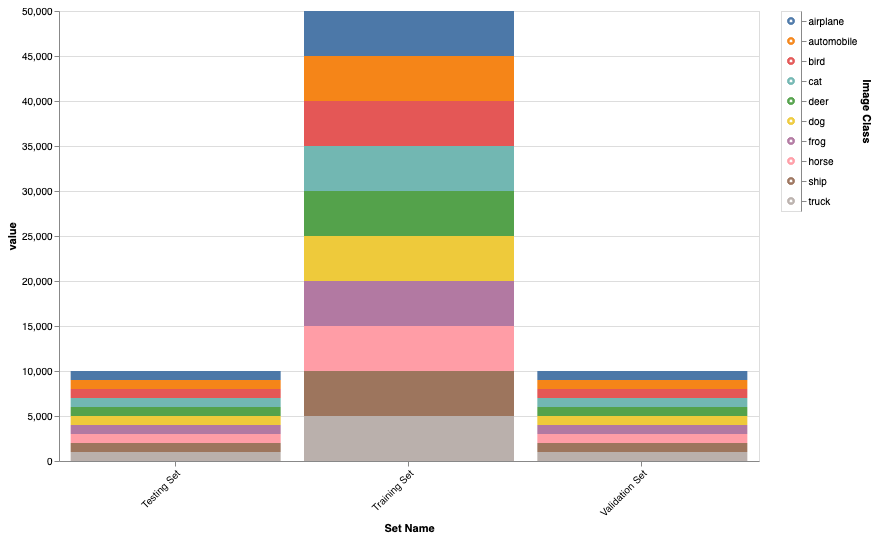

In [165]:
# Get the counts of each of the image types and put them in a dataframe
set_value_counts = pd.DataFrame([
    np.unique(y_train, return_counts=True)[1],
    np.unique(y_val, return_counts=True)[1],
    np.unique(y_test, return_counts=True)[1]
], index=['Training Set', 'Validation Set', 'Testing Set'])

set_value_counts.columns = set_value_counts.columns.map(CLASS_NAMES)
set_value_counts.columns.name = 'Image Class'
set_value_counts.index.name = 'Set Name'

# Transform the dataframe into a format suitable for altair
source = set_value_counts.reset_index().melt('Set Name')

# Create a multi selection index with every class pre-initialised
selection = alt.selection_multi(
    fields=["Image Class"]
)
color = alt.condition(
    selection, alt.Color("Image Class:N", legend=None), alt.value("lightgray")
)

barchart = (
    alt.Chart(source)
    .mark_bar()
    .encode(x=alt.X("Set Name:N", axis=alt.Axis(labelAngle=-45)),
            y="value:Q", color=color, 
            tooltip=[alt.Tooltip("Image Class:N", title='Image Class'), 
                     alt.Tooltip("value:N", title='Number of Images')])
    .add_selection(selection)
    .properties(width=700,height=450)
)

legend = (
    alt.Chart(source)
    .mark_point()
    .encode(y=alt.Y("Image Class:N", axis=alt.Axis(orient="right")), color=color)
    .add_selection(selection)
)

barchart | legend

In [166]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

In [164]:
from ipywidgets import interact, widgets
SAMPLE_SIZE = 101
img_idx_slider = widgets.IntSlider(value=0, min=0, max=SAMPLE_SIZE - 1, description="Image index", 
                                   layout=widgets.Layout(width='100%', height='50px'))

train_images_sample = {class_name: X_train[(y_train == class_idx).squeeze()][:SAMPLE_SIZE] 
                       for class_idx, class_name in CLASS_NAMES.items()}

@interact(i=img_idx_slider)
def visualize_prediction(i=0):
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    for ax, class_name in zip(axes.flat, CLASS_NAMES.values()):
        ax.imshow(train_images_sample[class_name][i].squeeze())
        ax.set_title(f"Class / label: {class_name}")

interactive(children=(IntSlider(value=0, description='Image index', layout=Layout(height='50px', width='100%')…

In [10]:
import datetime

from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler

import resnet

def preprocess(x, y):
    x = tf.image.per_image_standardization(x)
    return x, y

def augmentation(x, y):
#     x = tf.image.resize_with_crop_or_pad(
#         x, HEIGHT + 8, WIDTH + 8)
#     x = tf.image.random_crop(x, [HEIGHT, WIDTH, NUM_CHANNELS])
#     x = tf.image.random_flip_left_right(x)
    return x, y

def schedule(epoch):
    initial_learning_rate = BASE_LEARNING_RATE * BS_PER_GPU / 128
    learning_rate = initial_learning_rate
    for mult, start_epoch in LR_SCHEDULE:
        if epoch >= start_epoch:
            learning_rate = initial_learning_rate * mult
        else:
            break
    tf.summary.scalar('learning rate', data=learning_rate, step=epoch)
    return learning_rate

# y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
# y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

NUM_TRAIN_SAMPLES = 50000
train_dataset = train_dataset.map(augmentation).map(preprocess).shuffle(NUM_TRAIN_SAMPLES).batch(BATCH_SIZE)
val_dataset = val_dataset.map(preprocess).batch(BATCH_SIZE)
test_dataset = test_dataset.map(preprocess).batch(BATCH_SIZE)

# input_shape = (32, 32, 3)
# img_input = tf.keras.layers.Input(shape=input_shape)
# opt = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

# if NUM_GPUS == 1:
#     model = resnet.resnet56(img_input=img_input, classes=NUM_CLASSES)
#     model.compile(
#               optimizer=opt,
#               loss='sparse_categorical_crossentropy',
#               metrics=['sparse_categorical_accuracy'])
# else:
#     mirrored_strategy = tf.distribute.MirroredStrategy()
#     with mirrored_strategy.scope():
#         model = resnet.resnet56(img_input=img_input, classes=NUM_CLASSES)
#         model.compile(
#                 optimizer=opt,
#                 loss='sparse_categorical_crossentropy',
#                 metrics=['sparse_categorical_accuracy'])  

# log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# file_writer = tf.summary.create_file_writer(log_dir + "/metrics")
# file_writer.set_as_default()
# tensorboard_callback = TensorBoard(
#     log_dir=log_dir,
#     update_freq='batch',
#     histogram_freq=1)

# lr_schedule_callback = LearningRateScheduler(schedule)

# model.fit(train_dataset,
#           epochs=NUM_EPOCHS,
#           validation_data=test_dataset,
#           validation_freq=1,
#           callbacks=[tensorboard_callback, lr_schedule_callback])
# model.evaluate(test_dataset)

# model.save('model.h5')

# new_model = keras.models.load_model('model.h5')
 
# new_model.evaluate(test_dataset)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


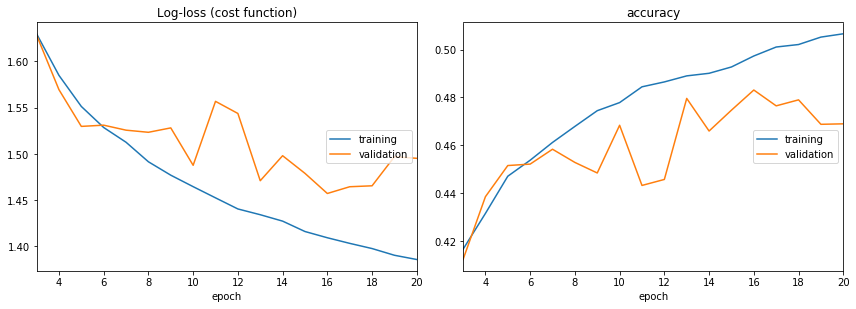

Log-loss (cost function):
training   (min:    1.386, max:    1.879, cur:    1.386)
validation (min:    1.457, max:    1.758, cur:    1.495)

accuracy:
training   (min:    0.316, max:    0.507, cur:    0.507)
validation (min:    0.375, max:    0.483, cur:    0.469)


In [25]:
# Create the baseline model described in the text above (TODO)
baseline_NN_model = tf.keras.Sequential([
    # Flatten RGB image + NN
    tf.keras.layers.Flatten(input_shape=IMG_SHAPE, name='Flatten'),
    tf.keras.layers.Dense(128, activation='relu', name='Dense_1'),
    tf.keras.layers.Dense(64, activation='relu', name='Dense_2'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax', name='Predictions')
], name='Baseline_NN_Model')

baseline_CNN_model=tf.keras.models.Sequential([
    # Conv + Max Pool - Block 1
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=IMG_SHAPE),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Conv + Max Pool - Block 2
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten + Basic NN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
], name='Baseline_CNN_Model')

# Print model summary - potentially remove - or print out image here
print(baseline_NN_model.summary())

# Compile the model - we will use the Adam optimiser and categorical crossentropy loss, logging the accuracy
# TODO: Tensorboard here and integrate callbacks into live tracking below? Potentially just a cleaner interface
baseline_NN_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)  

# Fit the baseline model to the training data, validating against the validation data
baseline_NN_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size = BATCH_SIZE,
    validation_data=(X_val, y_val),
    callbacks=[PlotLossesCallback()],
    verbose=0
)

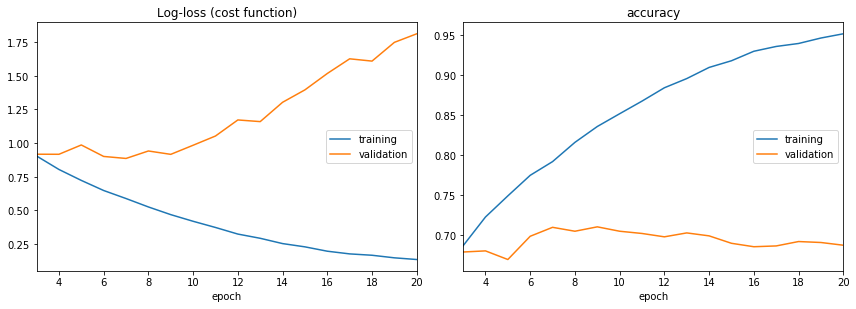

Log-loss (cost function):
training   (min:    0.136, max:    1.412, cur:    0.136)
validation (min:    0.886, max:    1.812, cur:    1.812)

accuracy:
training   (min:    0.492, max:    0.952, cur:    0.952)
validation (min:    0.601, max:    0.710, cur:    0.687)


In [26]:
baseline_CNN_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)  

# Fit the baseline model to the training data, validating against the validation data
baseline_CNN_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size = BATCH_SIZE,
    validation_data=(X_val, y_val),
    callbacks=[PlotLossesCallback()],
    verbose=0
)

In [18]:
def preprocess_mobilenet(x, y, for_mobilenet=False):
    x = tf.image.resize(x, (224, 224), method='bicubic') # could make `rows` in [96, 128, 160, 192, 224]?
    x = tf.image.per_image_standardization(x)
    return x, y

train_dataset = tf.data.Dataset.from_tensor_slices((x,y))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

tf.random.set_seed(42)
train_dataset = train_dataset.map(augmentation).map(preprocess_mobilenet).shuffle(NUM_TRAIN_SAMPLES).batch(BS_PER_GPU * NUM_GPUS, drop_remainder=True)
test_dataset = test_dataset.map(preprocess_mobilenet).batch(BS_PER_GPU * NUM_GPUS, drop_remainder=True)


# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

for image_batch, label_batch in train_dataset.take(1):
   pass

print('Image batch shape:', image_batch.shape)

feature_batch = base_model(image_batch)
print(feature_batch.shape)

base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = keras.layers.Dense(NUM_CLASSES)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

Image batch shape: (128, 224, 224, 3)
(128, 7, 7, 1280)
(128, 1280)
(128, 10)


In [ ]:

# Build a basic "baseline" model - just flattening the features and mapping to a dense layer.
# Visualise training accuracy and losses. Predictions of the two models
# Confusion matrix of two models **
# Visualise predictions of two models.
# tSNE embeddings of test images and 10 kNN with autonaming of clusters by class, perhaps dots are test images. Interactive

### Model Investigation

In [149]:
create_buttons()

Button(description='Run code', style=ButtonStyle())

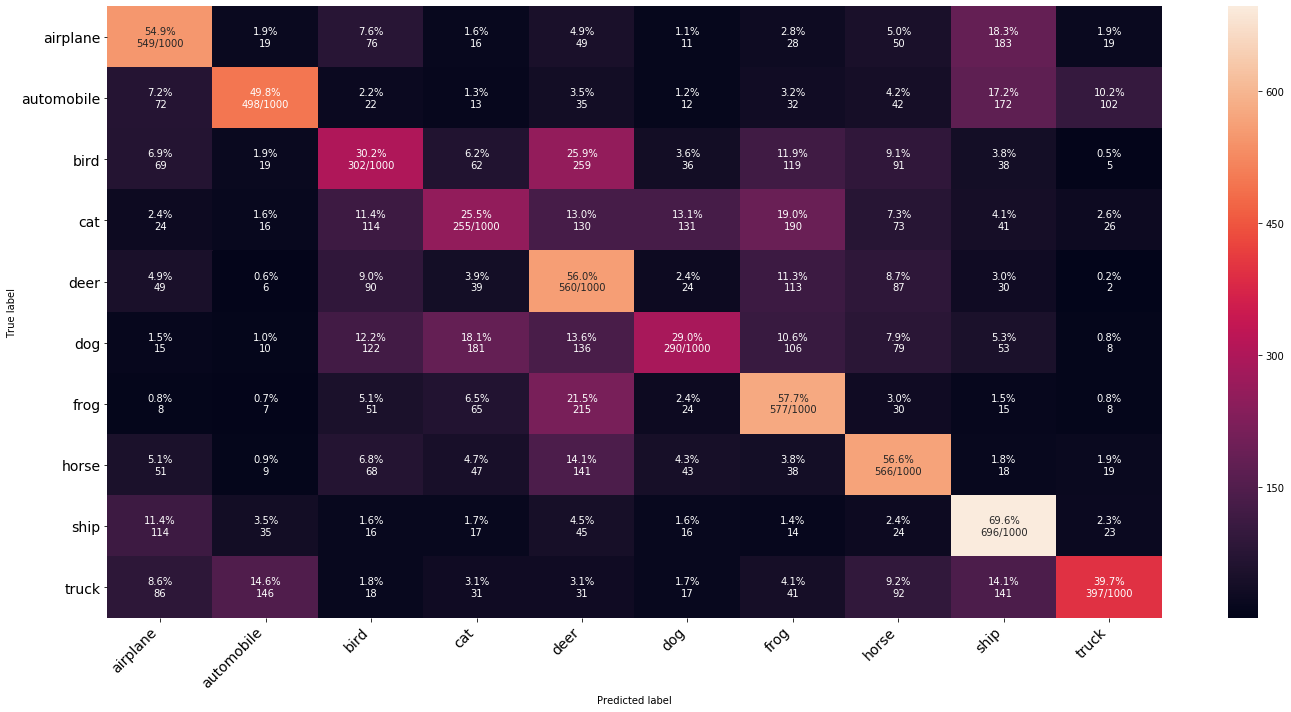

In [100]:
def get_model_outputs(model, inputs):
    model_probs = model.predict(inputs)
    model_preds = model_probs.argmax(axis=1)
    return model_probs, model_preds

baseline_NN_model_probs, baseline_NN_model_preds = get_model_outputs(baseline_NN_model, X_test)
print_confusion_matrix(baseline_NN_model_preds, y_test, class_names=CLASS_NAMES.values())

In [ ]:
create_buttons()

In [163]:
## Nice image slider: https://sanjayasubedi.com.np/deeplearning/tensorflow-2-first-neural-network-for-fashion-mnist/
from ipywidgets import interact, widgets
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(X_test)-1, description="Image index",
                                   layout=widgets.Layout(width='100%', height='50px'))

@interact(i=img_idx_slider)
def visualize_prediction(i=0):
    img_probs, img_pred = baseline_NN_model_probs[i], baseline_NN_model_preds[i].squeeze()
    fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(X_test[i])
    ax1.set_title(f"Label: {CLASS_NAMES[y_test[i][0]]}")
    ax1.set_xlabel(f"Prediction: {CLASS_NAMES[img_pred]}")

    sns.barplot(x=list(CLASS_NAMES.values()), y=img_probs*100, ax=ax2, 
                palette=['grey' if (prob < max(img_probs)) else 'gold' for prob in img_probs])
    plt.xticks(rotation=90)

interactive(children=(IntSlider(value=0, description='Image index', layout=Layout(height='50px', width='100%')…

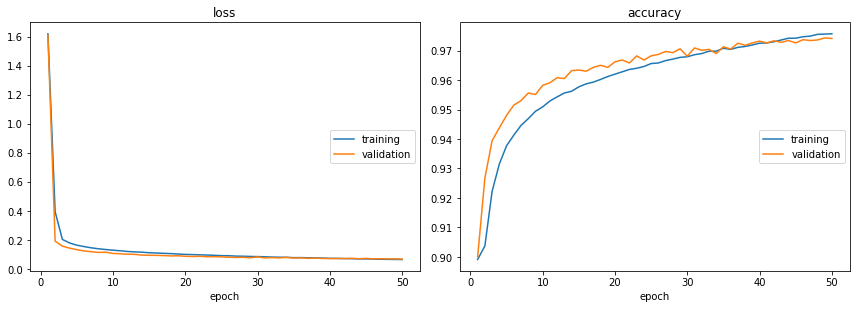

loss:
training   (min:    0.065, max:    1.620, cur:    0.065)
validation (min:    0.068, max:    1.612, cur:    0.068)

accuracy:
training   (min:    0.899, max:    0.976, cur:    0.976)
validation (min:    0.900, max:    0.974, cur:    0.974)


In [184]:
import time
liveplot = PlotLosses(skip_first=0)
with open('VGG_results.txt', 'r') as vgg_results:
    for line_count, line in enumerate(vgg_results):
        # If we have an even line then it will say Epoch x/50 - extract the epoch number
        if line_count % 2 == 0:
            epoch_num = line_count // 2 + 1
        else:
            loss, acc, val_loss, val_acc = (float(line.split(": ")[metric_num][:6]) for metric_num in range(1,5))
            liveplot.update({
                'loss': loss,
                'val_loss': val_loss,
                'accuracy': acc,
                'val_accuracy': val_acc
            })
            liveplot.draw()
            time.sleep(1.)
    

In [198]:
# TRYING TO GET VGG16 TO WORK - COULD JUST IMPORT FROM VGG16.PY...
vgg_model = tf.keras.Sequential([ 
    tf.keras.layers.Lambda(lambda x: tf.transpose(x, [0,3,1,2]), input_shape = IMG_SHAPE),
    # Block 1
    tf.keras.layers.Convolution2D(64, 3, 3, activation='relu', padding='same', name='block1_conv1', 
                                  input_shape=IMG_SHAPE),
    tf.keras.layers.Convolution2D(64, 3, 3, activation='relu', padding='same', name='block1_conv2'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'),

    # Block 2
    tf.keras.layers.Convolution2D(128, 3, 3, activation='relu', padding='same', name='block2_conv1'),
    tf.keras.layers.Convolution2D(128, 3, 3, activation='relu', padding='same', name='block2_conv2'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'),

    # Block 3
    tf.keras.layers.Convolution2D(256, 3, 3, activation='relu', padding='same', name='block3_conv1'),
    tf.keras.layers.Convolution2D(256, 3, 3, activation='relu', padding='same', name='block3_conv2'),
    tf.keras.layers.Convolution2D(256, 3, 3, activation='relu', padding='same', name='block3_conv3'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'),
    
    # Block 4
    tf.keras.layers.Convolution2D(512, 3, 3, activation='relu', padding='same', name='block4_conv1'),
    tf.keras.layers.Convolution2D(512, 3, 3, activation='relu', padding='same', name='block4_conv2'),
    tf.keras.layers.Convolution2D(512, 3, 3, activation='relu', padding='same', name='block4_conv3'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'),

    # Block 5
    tf.keras.layers.Convolution2D(512, 3, 3, activation='relu', padding='same', name='block5_conv1'),
    tf.keras.layers.Convolution2D(512, 3, 3, activation='relu', padding='same', name='block5_conv2'),
    tf.keras.layers.Convolution2D(512, 3, 3, activation='relu', padding='same', name='block5_conv3'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'),

    # Classification block
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(4096, activation='relu', name='fc1'),
    tf.keras.layers.Dense(4096, activation='relu', name='fc2'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax', name='predictions')
])

ValueError: Negative dimension size caused by subtracting 2 from 1 for 'block1_pool_3/MaxPool' (op: 'MaxPool') with input shapes: [?,1,4,64].

In [191]:
IMG_SHAPE

(32, 32, 3)